In [1]:
pip install pandas matplotlib geopandas

In [73]:
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import point 

In [74]:
data=pd.read_csv("Tourist Destinations.csv")

In [75]:
data.head()

,_key,Desc,category,district,latitude,longitude
0,Ansoo Lake,Ansoo Lake is situated in Kaghan Valley of Pak...,Lake,Khyber Pakhtunkhwa,34.814119,73.676428
1,Astola Island,"Astola Island, also known as Jezira Haft Talar...",Island,Balochistan,25.122321,63.847948
2,Attabad Lake,Attabad Lake is a lake in the Gojal Valley of ...,Lake,Gilgit−Baltistan,36.345827,74.865436
3,Badshahi Mosque,The Badshahi Mosque is a Mughal-era congregati...,Mosque,Punjab,31.588126,74.309322
4,Baltoro Glacier,"The Baltoro Glacier, at 63 km (39 mi) in lengt...",Mountainous,Gilgit−Baltistan,35.710642,76.553142


In [76]:
data.rename(columns = {'_key': 'place_name',
                    'Desc': 'place_descrption'}, inplace  = True)

In [77]:
data

,place_name,place_descrption,category,district,latitude,longitude
0,Ansoo Lake,Ansoo Lake is situated in Kaghan Valley of Pak...,Lake,Khyber Pakhtunkhwa,34.814119,73.676428
1,Astola Island,"Astola Island, also known as Jezira Haft Talar...",Island,Balochistan,25.122321,63.847948
2,Attabad Lake,Attabad Lake is a lake in the Gojal Valley of ...,Lake,Gilgit−Baltistan,36.345827,74.865436
3,Badshahi Mosque,The Badshahi Mosque is a Mughal-era congregati...,Mosque,Punjab,31.588126,74.309322
4,Baltoro Glacier,"The Baltoro Glacier, at 63 km (39 mi) in lengt...",Mountainous,Gilgit−Baltistan,35.710642,76.553142
...,...,...,...,...,...,...
64,Taxila Museum,"Taxila Museum is located at Taxila, Punjab, Pa...",Museum,Punjab,33.745900,72.818700
65,Thal Desert,"The Thal desert is situated in Punjab, Pakista...",Desert,Punjab,31.228100,71.809900
66,The Lahore Museum,"The Lahore Museum, is a museum located in Laho...",Museum,Punjab,31.568400,74.308100
67,Umbrella Waterfall Poona,Umbrella Waterfall is 150 km from Islamabad an...,Waterfall,Khyber Pakhtunkhwa,33.977090,73.482380


In [78]:
data.isnull().sum()

place_name          0
place_descrption    0
category            0
district            0
latitude            0
longitude           0
dtype: int64

In [79]:
# Summary statistics

data.describe()

,latitude,longitude
count,69.000000,69.000000
mean,32.839303,72.536530
std,3.511483,3.258586
min,24.814200,62.049984
25%,31.588126,72.579600
50%,33.858400,73.482380
75%,35.330300,74.309500
max,36.878411,76.553142


In [80]:
# Count attractions by category
attractions_by_category = data['category'].value_counts()
print(attractions_by_category)


Waterfall        17
Valley            9
Lake              8
Mountainous       5
Mosque            4
National Park     4
Coastal           4
Museum            4
Hill Station      3
Fort              3
Monument          2
Resort            2
Island            1
Temple            1
Mine              1
Desert            1
Name: category, dtype: int64


In [81]:
df = pd.DataFrame(data)


In [82]:
pip install geopandas shapely


Note: you may need to restart the kernel to use updated packages.


In [83]:
import shapely.geometry


In [84]:
gdf = gpd.GeoDataFrame(df, 
                        geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

C:\Users\TripKar\AppData\Local\Temp\ipykernel_10064\966994927.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


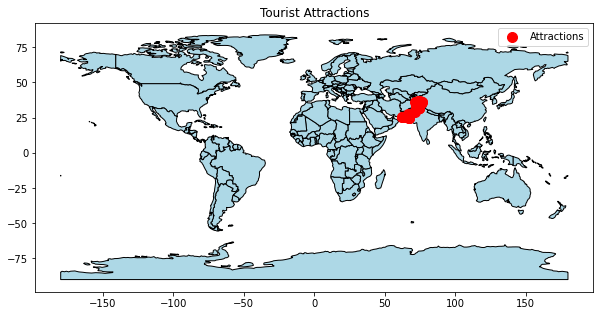

In [85]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 10), color='lightblue', edgecolor='k')
gdf.plot(ax=ax, color='red', markersize=100, marker='o', label='Attractions')
plt.title('Tourist Attractions')
plt.legend()
plt.show()

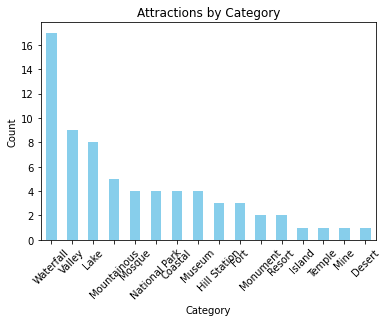

In [86]:
attractions_by_category.plot(kind='bar', color='skyblue')
plt.title('Attractions by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [87]:
attractions_per_district =df.groupby('district').size().reset_index(name='attraction_count')


In [88]:
attractions_per_distric

NameError: name 'attractions_per_distric' is not defined

In [ ]:
# Plot attractions count per district
plt.figure(figsize=(10, 6))
plt.bar(attractions_per_district['district'], attractions_per_district['attraction_count'], color='skyblue')
plt.xlabel('District')
plt.ylabel('Number of Attractions')
plt.title('Number of Attractions per District')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
attractions_in_punjab = df[df['district'] == 'Punjab']
attractions_count_in_punjab = len(attractions_in_punjab)

# Print the number of attractions in 'Punjab'
print(f"Number of attractions in Punjab: {attractions_count_in_punjab}")

In [ ]:
# Filter attractions in the district named 'Punjab'
attractions_in_punjab = df[df['district'] == 'Punjab']

# Display names and details of attractions in 'Punjab'
print(f"Attractions in Punjab:",attractions_in_punjab)
for index, row in attractions_in_punjab.iterrows():
    print(f"Name: {row['place_name']} | Category: {row['category']}")

In [89]:
import seaborn as sns


In [90]:


#Filter attractions categorized as 'waterfall'
waterfall_attractions = df[df['category'] == 'waterfall']

# Count waterfalls per district
waterfalls_per_district = waterfall_attractions['district'].value_counts().reset_index()
waterfalls_per_district.columns = ['district', 'Waterfall Count']

# Plotting the number of waterfalls per district
#plt.figure(figsize=(10, 6))
#sns.barplot(x='district', y='Waterfall Count', data=waterfalls_per_district, palette='viridis')
#plt.title('Number of Waterfalls in Each District')
#plt.xlabel('District')
#plt.ylabel('Number of Waterfalls')
#plt.xticks(rotation=45, ha='right')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show

In [91]:
waterfalls_per_district= len(waterfalls_per_district)

In [92]:
waterfalls_per_district

0

In [93]:
waterfall_attractions = df[df['category'] == 'waterfall']
waterfall_attractions=len(waterfall_attractions)

In [95]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
